
Średni stopień wierzchołka <k>: 43.6910


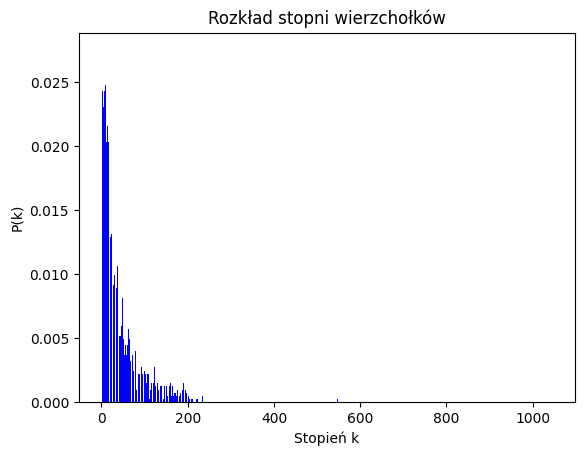

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Funkcja do wczytania danych z pliku i stworzenia grafu
def read_graph_from_file(file_path):
    G = nx.Graph()
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.split()
            if len(parts) != 2:
                continue
            u, v = int(parts[0]), int(parts[1])
            G.add_edge(u, v)
    return G

# Funkcja do obliczenia rozkładu stopni wierzchołków
def degree_distribution(G):
    degrees = [G.degree(n) for n in G.nodes()]
    max_degree = max(degrees)
    degree_count = [0] * (max_degree + 1)
    for degree in degrees:
        degree_count[degree] += 1
    total_nodes = len(G.nodes())
    Pk = [count / total_nodes for count in degree_count]
    return Pk

# Funkcja do obliczenia średniego stopnia wierzchołka
def average_degree(G):
    degrees = [G.degree(n) for n in G.nodes()]
    avg_degree = sum(degrees) / len(degrees)
    return avg_degree

# Ścieżka do pliku z danymi
file_path = r'C:\Users\Rafal\OneDrive\Dokumenty\GitHub\Fizyka-uk-ad-w-z-o-onych\facebook_combined.txt'  # Upewnij się, że ścieżka jest poprawna

# Wczytanie grafu z pliku
G = read_graph_from_file(file_path)

# Obliczenie rozkładu stopni wierzchołków
Pk = degree_distribution(G)

# Obliczenie średniego stopnia wierzchołka
avg_degree = average_degree(G)


print(f"\nŚredni stopień wierzchołka <k>: {avg_degree:.4f}")

# Rysowanie rozkładu stopni
plt.bar(range(len(Pk)), Pk, width=0.8, color='blue')
plt.xlabel('Stopień k')
plt.ylabel('P(k)')
plt.title('Rozkład stopni wierzchołków')
plt.show()


Średni współczynnik gronowania: 0.6055


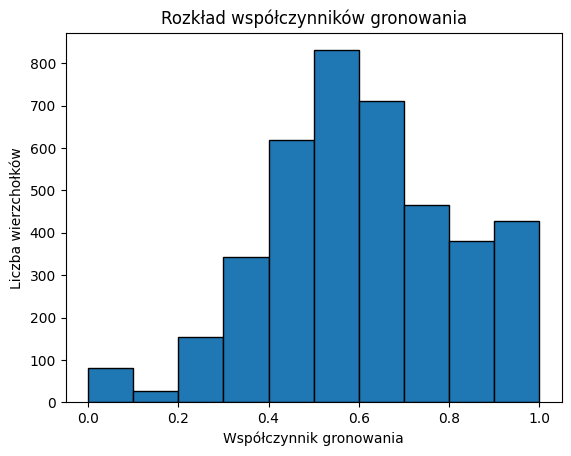

In [14]:
def clustering_coefficients(G):
    clustering_coeffs = nx.clustering(G)
    return clustering_coeffs

# Funkcja do obliczenia średniego współczynnika gronowania
def average_clustering_coefficient(G):
    avg_clustering = nx.average_clustering(G)
    return avg_clustering

# Wczytanie grafu z pliku
G = read_graph_from_file(file_path)

# Obliczenie współczynników gronowania
clustering_coeffs = clustering_coefficients(G)

# Obliczenie średniego współczynnika gronowania
avg_clustering = average_clustering_coefficient(G)

print(f"\nŚredni współczynnik gronowania: {avg_clustering:.4f}")

# Obliczenie rozkładu współczynników gronowania
coeff_values = list(clustering_coeffs.values())
plt.hist(coeff_values, bins=10, edgecolor='black')
plt.xlabel('Współczynnik gronowania')
plt.ylabel('Liczba wierzchołków')
plt.title('Rozkład współczynników gronowania')
plt.show()


Średnia długość najkrótszej ścieżki: 3.6925
Średnica grafu: 8


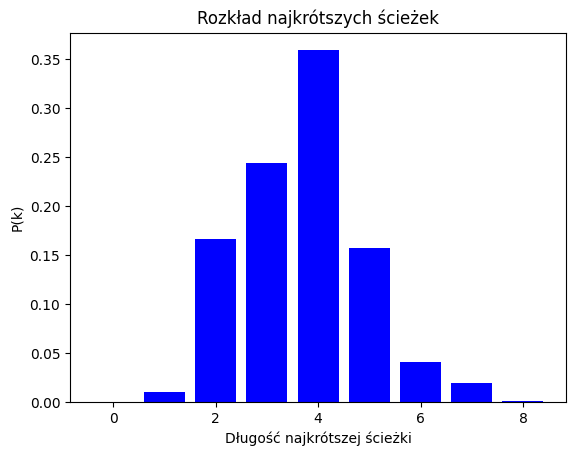

In [17]:
# Funkcja do obliczenia rozkładu najkrótszych ścieżek
def shortest_path_distribution(G):
    lengths = dict(nx.all_pairs_shortest_path_length(G))
    path_length_count = {}
    
    for source, target_lengths in lengths.items():
        for target, length in target_lengths.items():
            if length not in path_length_count:
                path_length_count[length] = 0
            path_length_count[length] += 1
    
    total_paths = sum(path_length_count.values())
    Pk = {length: count / total_paths for length, count in path_length_count.items()}
    return Pk

# Funkcja do obliczenia średniej długości najkrótszej ścieżki
def average_shortest_path_length(G):
    return nx.average_shortest_path_length(G)

# Funkcja do obliczenia średnicy grafu
def diameter(G):
    return nx.diameter(G)


# Wczytanie grafu z pliku
G = read_graph_from_file(file_path)

# Obliczenie rozkładu najkrótszych ścieżek
Pk = shortest_path_distribution(G)

# Obliczenie średniej długości najkrótszej ścieżki
avg_shortest_path = average_shortest_path_length(G)

# Obliczenie średnicy grafu
graph_diameter = diameter(G)


print(f"\nŚrednia długość najkrótszej ścieżki: {avg_shortest_path:.4f}")
print(f"Średnica grafu: {graph_diameter}")

# Rysowanie rozkładu najkrótszych ścieżek
plt.bar(Pk.keys(), Pk.values(), width=0.8, color='blue')
plt.xlabel('Długość najkrótszej ścieżki')
plt.ylabel('P(k)')
plt.title('Rozkład najkrótszych ścieżek')
plt.show()